In [3]:
from IPython.core.display import Image, display

C:\Users\Dimi\AppData\Local\Temp\ipykernel_2272\3464626361.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Image, display


In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  

In [5]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Degree in Data Science and Engineering, group 96
## Machine Learning 2
### Fall 2022

&nbsp;
&nbsp;
&nbsp;
# Lab 1. Neighbors & Trees

&nbsp;
&nbsp;
&nbsp;

**Emilio Parrado Hernández**

Dept. of Signal Processing and Communications

&nbsp;
&nbsp;
&nbsp;




<img src='http://www.tsc.uc3m.es/~emipar/BBVA/INTRO/img/logo_uc3m_foot.jpg' width=400 />

# A real world problem: Boston Housing

## UCI repository of ML datasets
[Boston Housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) is one of the classic benchmark problems in the [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php). In general, the usual way to compare the performances of different machine learning algorithms consists in to evaluate their performances in solving bechmark problems. There is another approximation, the field of *Statistical Learning Theory* (SLT), that tries to analize these performances through the use of **bounds** on the generalization capabilities of these algorithms. Being pragmatical, although SLT seems a quite more robust approach, real experience teaches that the estimation of performances based on *benchmarks* predict more accurately what practitioners experience when they put this algorithms to work with real data.

The UCI repository is a key reference for the design and development of general purpose machine learning algorithms, as it enables to esily gather intuitions about the performance of such algorithms in different situations.  




# 1. Loading data
 
1. Read data (from file, database)
2. Separate observations from *targets*
3. Divide data into two sets: **training** and **test**



## 1.1. Read data

This dataset can be directly loaded from sklearn. First read the description of the task and features here https://scikit-learn.org/stable/datasets/index.html#boston-dataset

In [24]:
from sklearn.datasets import load_boston
# read data from sklearn and create a pandas dataframe
boston = load_boston()
data = boston['data'] # the observations
print("The data set is formed by {0:d} observations in {1:d} dimensions".format(data.shape[0], data.shape[1]))
targets = boston['target'] # the targets
columns = [cc for cc in boston['feature_names']] +['target']
boston_df = pd.DataFrame(np.vstack((data.T, targets)).T, columns=columns) 
boston_df.head() # print 5 rows of the dataframe

The data set is formed by 506 observations in 13 dimensions


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston_df.describe() # print simple statistics of all the rows in the dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 1.2. Separate observations from targets

In this case this is already done by sklearn. The method [`load_boston`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) returns a python dictionary where key `data` contains the observations and key `target` their corresponding targets.

## 1.3. Divide data into training and test sets

The key indicator of the good performance of a machine learning model is its **generalization capability**. This means that the model outputs correct inferences about data not used during the training phase. A common way of addressing this point is to split the data into two disjoint partitions:
- the **training set**, observations used by the **training algorithm** to optimize the model (remember, fix values to the free parameters of the model)

- the **test set** is a separate set that is processed with an  **already trained model**. We use the test set to assess the **generalization capabilities** of the model. A model presents a good generalization when its performance in the test set is similar to its performance in the training set.




Anyway, don't forget that:
- **the test set is just another set**. It means that when we eventually put the model **in production** we still need to monitor its performance with the different test sets that we will be getting (every day, hour, week, etc)
- Sometimes we try to refine a model  **using the performance in the test sets**. This too usual practice introduces biases in the estimation of the performances of the model as we are  **feeding back information from the test**. Somehow this means that the test is taking part in the training, so the test set can't be considered 100% independent from the training process.




In some datasets the training/test split is already defined. In cases where the data comes in a single set (like this Boston Housing problem) the data scientist needs to propose a division. It is common to leave a larger proportion of data for training purposes than for test. Usual sizes for these sets are
- 50% training, 50% test
- 70% training, 30% test
- 80% training, 20% test

The trade-off you have to take into account is the following:
- A larger training data means you optimizer will have more information to find suitable values for the parameters. You need a significantly larger number of data compared to the number of free parameters of the model in order to experience a robust learning.
- A larger test set means that your estimation of the generalization capabilities of the model with new, unseen data will be more reliable. 

Sklearn has a built-in method to carry out the splitting of a data set in training and test sets: [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Explore it to split your data in a 70% for training, 30% for testing partition. Fix the value of parameter `random_state` to ease reproducibility (I usually use 42).

In [39]:
#############
#           #
# YOUR CODE #
#           #
#############
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.30, random_state=42)


In [40]:
len(y_train)

354

# 2. First models

The first step is to start exploring solutions by learning simple models. We use the 3 families that were reviewed in the lecture: kNN, Decision Trees and Random Forest.

Before starting with the learnings with must decide a metric to evaluate the performance of the algorithms. We will use the [$R^2$ statistic](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score)  (discussed also in the lecture) as it is the default score in sklearn.


## 2.1 First model with $k$NN

Explore different combinations of the **number of neighbors** $k$ **with and without weighting** the vote of each neighbor. 
- Use plots of $R^2$ versus $k$ to present the results
- Decide the configuration of the best model and print the $R^2$ achieved by this best model in the training and in the test set.

In [41]:
#############
#           #
# YOUR CODE #
#           #
#############

from sklearn.neighbors import KNeighborsRegressor

#range for the number of neighbors to be explored
v_nn = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,350]

# store the accuracy predicting the training set with uniform weighting of votes
r2_entr = np.empty(len(v_nn))

# store the accuracy predicting the test set with uniform weighting of votes
r2_test = np.empty(len(v_nn))

# store the accuracy predicting the training set with votes weighted by inverse distance
r2_entr_w = np.empty(len(v_nn))

# store the accuracy predicting the test set with votes weighted by inverse distance
r2_test_w = np.empty(len(v_nn))


#main loop
for inn, n_neighbors in enumerate(v_nn):
    #instantiate model with uniform voting
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    #train model
    knn.fit(x_train, y_train)
    #compute scores
    r2_entr[inn] = knn.score(x_train, y_train)
    r2_test[inn] = knn.score(x_test, y_test)
    #instantiate model with weightd voting
    knn_w = KNeighborsRegressor(n_neighbors=n_neighbors, weights='distance')
    #train model
    knn_w.fit(x_train, y_train)
    #compute scores
    r2_entr_w[inn] = knn_w.score(x_train, y_train)
    r2_test_w[inn] = knn_w.score(x_test, y_test)
    


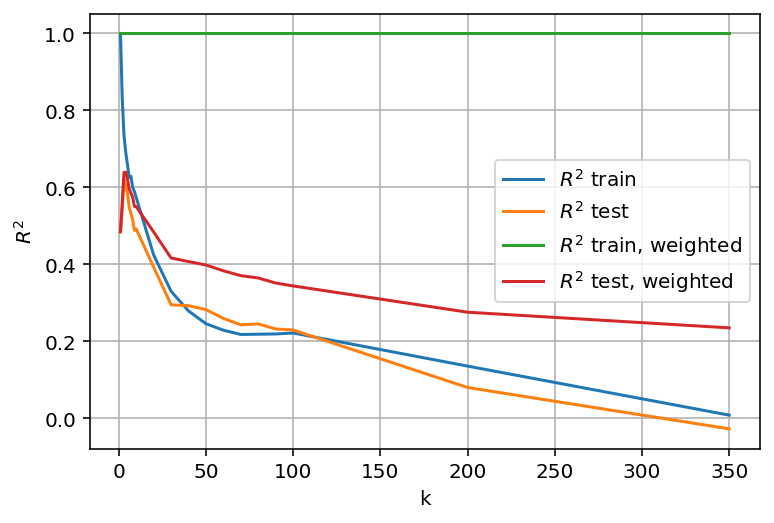

Best k, unit vote for the test set is 3, R^2=0.62
Best k, weighted vote for the test set is 4, R^2=0.64


In [42]:
#####################
# CODE FOR PLOTTING #
#####################
plt.figure()
plt.plot(v_nn, r2_entr, label='$R^2$ train')
plt.plot(v_nn, r2_test, label='$R^2$ test')
plt.plot(v_nn, r2_entr_w, label='$R^2$ train, weighted')
plt.plot(v_nn, r2_test_w, label='$R^2$ test, weighted')
_ = plt.xlabel('k')
_ = plt.ylabel('$R^2$')
_ = plt.legend()

plt.grid()
best_k = v_nn[np.argmax(r2_test)]
plt.show()
print("Best k, unit vote for the test set is {0:d}, R^2={1:.2f}".format(best_k, np.max(r2_test)))
best_k_w = v_nn[np.argmax(r2_test_w)]
plt.show()
print("Best k, weighted vote for the test set is {0:d}, R^2={1:.2f}".format(best_k_w, np.max(r2_test_w)))



## 2.2 First model with Decision Trees

Explore different combinations of the **maximum number of leaf nodes** $k$.
- Use plots of $R^2$ versus the maximum number of leaves to present the results
- Decide the configuration of the best model and print the $R^2$ achieved by this best model in the training and in the test set.

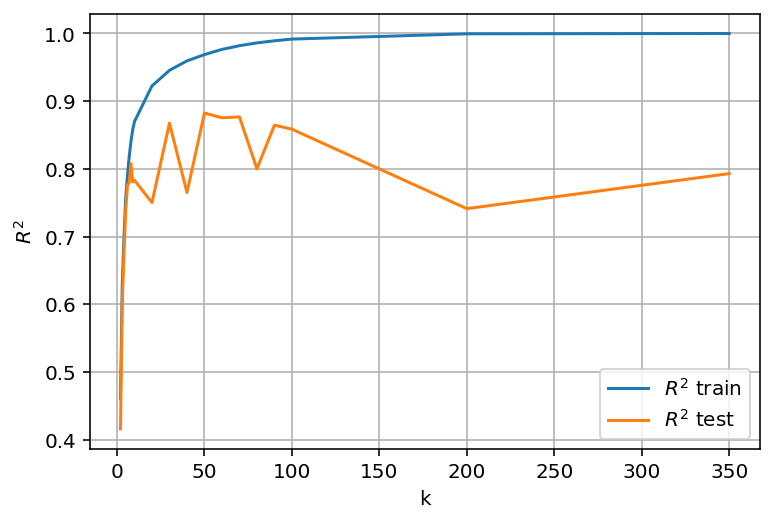

Best k, unit vote for the test set is 50, R^2=0.88


In [43]:
#############
#           #
# YOUR CODE #
#           #
#############

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#range for the number of neighbors to be explored
v_nn = [2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,350]

# store the accuracy predicting the training set with uniform weighting of votes
r2_entr = np.empty(len(v_nn))

# store the accuracy predicting the test set with uniform weighting of votes
r2_test = np.empty(len(v_nn))

# store the accuracy predicting the training set with votes weighted by inverse distance
r2_entr_w = np.empty(len(v_nn))

# store the accuracy predicting the test set with votes weighted by inverse distance
r2_test_w = np.empty(len(v_nn))


#main loop
for inn, max_leaf in enumerate(v_nn): #max_leaf_nodes=None
    #instantiate model with uniform voting
    knn = DecisionTreeRegressor(max_leaf_nodes=max_leaf)
    #train model
    knn.fit(x_train, y_train)
    #compute scores
    r2_entr[inn] = knn.score(x_train, y_train)
    r2_test[inn] = knn.score(x_test, y_test)
    
#####################
# CODE FOR PLOTTING #
#####################
plt.figure()
plt.plot(v_nn, r2_entr, label='$R^2$ train')
plt.plot(v_nn, r2_test, label='$R^2$ test')

_ = plt.xlabel('k')
_ = plt.ylabel('$R^2$')
_ = plt.legend()

plt.grid()
best_k = v_nn[np.argmax(r2_test)]
plt.show()
print("Best k, unit vote for the test set is {0:d}, R^2={1:.2f}".format(best_k, np.max(r2_test)))


## 2.3. First model with Random Forests

Explore different combinations of the **number of trees in the forest** and of the **maximum number of leaves in each tree**. 
- For the maximum number of leaves, use just 3 values: 
  - 3
  - the number you selected as better choice for the decision tree
  - A reasonable number between 3 and the second choice (look at the $R^2$ vs number of leaves plot to get insights for this choice).

- Use plots of $R^2$ versus the number of trees to present the results
- Hint: explore the number of trees using logarithmic jumps between 1 and 1000
- Decide the configuration of the best model and print the $R^2$ achieved by this best model in the training and in the test set.

In [32]:
#############
#           #
# YOUR CODE #
#           #
#############
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
RandomForestRegressor(...)
print(regr.predict([[0, 0, 0, 0]]))
[-8.32987858]

[-8.32987858]


[-8.32987858]

# 3. Simple transformations of features

Normalization of the features is one of the most used pre-processing techniques in machine learning. If we consider each feature a **random variable**, the normalization transforms it into a random variable with **zero mean** and **unit variance**.
$$
x_i \longrightarrow \frac{x_i - \mathbb E\{x\}}{\mbox{std dev}\{x\}}
$$
There is a sklearn module that implements normalization for us: [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

`StandardScaler` basic methods `fit` and `transform` will do the work for us:



In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #instantiate
scaler.fit(x_train)  # fit with training data
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)
print("Training set")
print("Means before -> Means after")
for ii in range(x_train.shape[1]):
  print("{0:.3f}  ->  {1:.3f}".format(x_train[:,ii].mean(0),x_train_s[:,ii].mean(0)))
print("")
print("Std dev before -> Std dev after")
for ii in range(x_train.shape[1]):
  print("{0:.3f}  ->  {1:.3f}".format(x_train[:,ii].std(0),x_train_s[:,ii].std(0)))
print("")

print("Test set")
print("Means before -> Means after")
for ii in range(x_test.shape[1]):
  print("{0:.3f}  ->  {1:.3f}".format(x_test[:,ii].mean(0),x_test_s[:,ii].mean(0)))
print("")
print("Std dev before -> Std dev after")
for ii in range(x_train.shape[1]):
  print("{0:.3f}  ->  {1:.3f}".format(x_test[:,ii].std(0),x_test_s[:,ii].std(0)))
print("")



Training set
Means before -> Means after
3.351  ->  -0.000
11.717  ->  -0.000
11.262  ->  0.000
0.077  ->  -0.000
0.557  ->  -0.000
6.327  ->  0.000
68.940  ->  0.000
3.762  ->  -0.000
9.484  ->  0.000
409.133  ->  0.000
18.262  ->  0.000
358.431  ->  0.000
12.498  ->  -0.000

Std dev before -> Std dev after
7.678  ->  1.000
22.947  ->  1.000
6.958  ->  1.000
0.266  ->  1.000
0.118  ->  1.000
0.720  ->  1.000
27.910  ->  1.000
2.141  ->  1.000
8.655  ->  1.000
166.073  ->  1.000
2.242  ->  1.000
88.470  ->  1.000
7.170  ->  1.000

Test set
Means before -> Means after
4.146  ->  0.103
10.647  ->  -0.047
10.883  ->  -0.054
0.054  ->  -0.086
0.549  ->  -0.072
6.198  ->  -0.180
67.834  ->  -0.040
3.861  ->  0.046
9.683  ->  0.023
406.419  ->  -0.016
18.849  ->  0.262
353.107  ->  -0.060
12.969  ->  0.066

Std dev before -> Std dev after
10.180  ->  1.326
23.983  ->  1.045
6.629  ->  0.953
0.226  ->  0.849
0.112  ->  0.952
0.656  ->  0.912
28.530  ->  1.022
2.023  ->  0.945
8.784  ->  1.015

# REMEMBER TO FIT YOUR SCALER ONLY WITH TRAINING DATA
# DO NOT USE TEST DATA TO FIT THE SCALER

## 3.1 $k$NN with normalized data
Repeat the study in section 2.1 using the scaled data

In [ ]:
#############
#           #
# YOUR CODE #
#           #
#############
from sklearn.neighbors import KNeighborsRegressor

#range for the number of neighbors to be explored
v_nn = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,350]

# store the accuracy predicting the training set with uniform weighting of votes
r2_entr = np.empty(len(v_nn))

# store the accuracy predicting the test set with uniform weighting of votes
r2_test = np.empty(len(v_nn))

# store the accuracy predicting the training set with votes weighted by inverse distance
r2_entr_w = np.empty(len(v_nn))

# store the accuracy predicting the test set with votes weighted by inverse distance
r2_test_w = np.empty(len(v_nn))


#main loop
for inn, n_neighbors in enumerate(v_nn):
    #instantiate model with uniform voting
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    #train model
    knn.fit(x_train, y_train)
    #compute scores
    r2_entr[inn] = knn.score(x_train, y_train)
    r2_test[inn] = knn.score(x_test, y_test)
    #instantiate model with weightd voting
    knn_w = KNeighborsRegressor(n_neighbors=n_neighbors, weights='distance')
    #train model
    knn_w.fit(x_train, y_train)
    #compute scores
    r2_entr_w[inn] = knn_w.score(x_train, y_train)
    r2_test_w[inn] = knn_w.score(x_test, y_test)
    


In [ ]:
#####################
# CODE FOR PLOTTING #
#####################
plt.figure()
plt.plot(v_nn, r2_entr, label='$R^2$ train')
plt.plot(v_nn, r2_test, label='$R^2$ test')
plt.plot(v_nn, r2_entr_w, label='$R^2$ train, weighted')
plt.plot(v_nn, r2_test_w, label='$R^2$ test, weighted')
_ = plt.xlabel('k')
_ = plt.ylabel('$R^2$')
_ = plt.legend()

plt.grid()
best_k = v_nn[np.argmax(r2_test)]
plt.show()
print("Best k, unit vote for the test set is {0:d}, R^2={1:.2f}".format(best_k, np.max(r2_test)))
best_k_w = v_nn[np.argmax(r2_test_w)]
plt.show()
print("Best k, weighted vote for the test set is {0:d}, R^2={1:.2f}".format(best_k_w, np.max(r2_test_w)))


## 3.2 Decision Trees with normalized data
Repeat the study in section 2.2 using the scaled data

In [ ]:
#############
#           #
# YOUR CODE #
#           #
#############


## 3.3 Random Forests with normalized data
Repeat the study in section 2.3 using the scaled data

In [ ]:
#############
#           #
# YOUR CODE #
#           #
#############


# 4. Pipelines

Scikit learn provides with a easy and clean way to automatize the scaling before the use of a machine learning method, the [**pipelines**](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Read the documentation about the use of pipelines and understand the following example.

In [34]:
from sklearn.pipeline import Pipeline

# definition of the pipeline with the list of methods to be connected
# each member of the list is a tuple: ('name of the stage', StageConstructorMethod(arg1, arg2, ...))
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('kNN', KNeighborsRegressor(n_neighbors=2, weights='distance'))])
"""
Fitting the pipeline performs a sequential invocation of the fit methods of 
all the connected stages. The output of the previous stage serves as input for
the next one.
"""
pipe.fit(x_train, y_train)

# evaluation of the scaler + regressor
train_risk = pipe.score(x_train, y_train)
test_risk = pipe.score(x_test, y_test)
print("R^2 in the training set after scaling: {0:.2f}".format(train_risk))
print("R^2 in the test set after scaling: {0:.2f}".format(test_risk))

R^2 in the training set after scaling: 1.00
R^2 in the test set after scaling: 0.79


# 5. MinMax Scaler
Another alternative to the normalization is to scale each feature so that its range of values lays between 0 and 1. Scikit Learn module [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) does this job for us.

Repeat sections 3.1, 3.2 and 3.3 but using a MinMax Scaler instead of a StandardScaler and connecting scaler and regressor with a pipeline.

In [ ]:
#############
#           #
# YOUR CODE #
#           #
#############



# 6. Wrapping up
Discussion, general results
- What was the best model to solve the Boston Housing problem?
- How significant are the differences in performance?
- Which is the impact of scaling the features in the three methods?
- Is there any significant difference in performance in the two scalers?

About $kNN$
- Discuss the impact of scaling.
- How is the behavior of $k$NN as $k$ increases?

About Decision Trees
- Impact of scaling.
- Grow and draw a tree with just 4 or 5 leaf nodes and discuss if the features used for these first splits make sense

About Random Forest
- Impact of scaling the features
- Discuss how varies the performance with the number of leaf nodes per tree and the size of the forest.